<a href="https://colab.research.google.com/github/sanyhmahadi/sanyhmahadi-MentalSituationInCovid19Bert/blob/main/MentalSituationInCovid19Bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip3 install ktrain
import pandas as pd
import numpy as np
 
import ktrain
from ktrain import text
df = pd.read_excel("/content/drive/MyDrive/Research/NLP/covidSentimentData.xlsx",)

In [ ]:
data_train = pd.read_excel('/content/drive/MyDrive/Research/NLP/covidSentimentData.xlsx')
data_test = pd.read_excel('/content/drive/MyDrive/Research/NLP/TestCovidSentiment.xlsx')

X_train = data_train.TypeOfOpinion.tolist()
X_test = data_test.TypeOfOpinion.tolist()

y_train = data_train.Status.tolist()
y_test = data_test.Status.tolist()

data = data_train.append(data_test, ignore_index=True)

class_names = ['yes', 'No']

print('size of training set: %s' % (len(data_train['TypeOfOpinion'])))
print('size of validation set: %s' % (len(data_test['TypeOfOpinion'])))
print(data.Status.value_counts())

data.head(10)

size of training set: 443
size of validation set: 99
yes    292
No     250
Name: Status, dtype: int64


,TypeOfOpinion,Status
0,"স্বাস্থ সচেতন হয়েছি, এই সময়ে সময়ে এক্সট্রা এ এ...",yes
1,"স্বাস্থ সচেতন হয়েছি, এই সময়ে সময়ে এক্সট্রা এ এ...",yes
2,"স্বাস্থ সচেতন হয়েছি, এই সময়ে সময়ে এক্সট্রা এ এ...",No
3,পড়ালেখা বিঘ্নিত হয়েছে,yes
4,"স্বাস্থ সচেতন হয়েছি, পড়ালেখা বিঘ্নিত হয়েছে",yes
5,স্বাস্থ সচেতন হয়েছি,No
6,"স্বাস্থ সচেতন হয়েছি, পড়ালেখা বিঘ্নিত হয়েছে",No
7,"স্বাস্থ সচেতন হয়েছি, এই সময়ে সময়ে এক্সট্রা এ এ...",yes
8,স্বাস্থ সচেতন হয়েছি,No
9,স্বাস্থ সচেতন হয়েছি,No


In [ ]:
encoding = {
    'No': 0,
    'yes': 1,
   
    
}

# Integer values for each class
y_train = [encoding[x] for x in y_train]
y_test = [encoding[x] for x in y_test]

In [ ]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=X_train, y_train=y_train,
                                                                       x_test=X_test, y_test=y_test,
                                                                       class_names=class_names,
                                                                       preprocess_mode='bert',
                                                                       maxlen=350, 
                                                                       max_features=35000)

preprocessing train...
language: bn


Is Multi-Label? False
preprocessing test...
language: bn


task: text classification


In [ ]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 350
done.


In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=6)

In [ ]:
learner.fit_onecycle(2e-5, 3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
74/74 [==============================] - 2207s 29s/step - loss: 0.6822 - accuracy: 0.5506 - val_loss: 0.5444 - val_accuracy: 0.7172
Epoch 2/3
74/74 [==============================] - 2153s 29s/step - loss: 0.6482 - accuracy: 0.6776 - val_loss: 0.5538 - val_accuracy: 0.6364
Epoch 3/3
74/74 [==============================] - 2143s 29s/step - loss: 0.5611 - accuracy: 0.7251 - val_loss: 0.5206 - val_accuracy: 0.7879


In [ ]:
learner.validate(val_data=(x_test, y_test), class_names=class_names)

              precision    recall  f1-score   support

         yes       0.72      0.86      0.78        44
          No       0.87      0.73      0.79        55

    accuracy                           0.79        99
   macro avg       0.79      0.80      0.79        99
weighted avg       0.80      0.79      0.79        99



array([[38,  6],
       [15, 40]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['yes', 'No']

In [ ]:
import time 

message = 'করোনাভাইরাসের সংক্রমণ প্রতিরোধে টিকা নিয়েছেন আওয়ামী লীগের সাধারণ সম্পাদক এবং সড়ক পরিবহন ও সেতুমন্ত্রী ওবায়দুল কাদের।'

start_time = time.time() 
prediction = predictor.predict(message)

print('predicted: {} ({:.2f})'.format(prediction, (time.time() - start_time)))

predicted: No (1.65)


In [ ]:
predictor.save("models/bert_model")

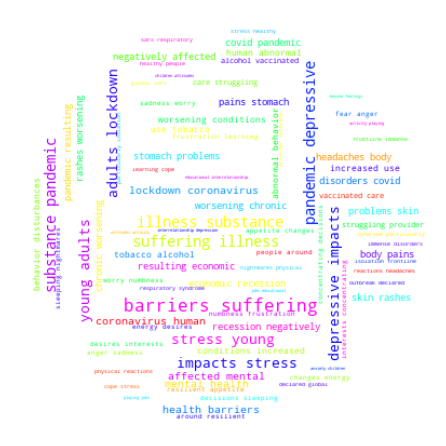

In [ ]:
#("/content/drive/MyDrive/Research/NLP/BnText.xlsx")

# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import numpy as np
from PIL import Image

# Reads 'Youtube04-Eminem.csv' file
df = pd.read_excel(("/content/drive/MyDrive/Research/NLP/BnText.xlsx"))

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.jp:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

mask = np.array(Image.open('/content/drive/MyDrive/Research/NLP/rou.jpg'))

wordcloud = WordCloud(stopwords=STOPWORDS,
               mask=mask, background_color="white",
               max_words=602, max_font_size=256,
               #min_font_size = 100,
               colormap="gist_rainbow",
                width=mask.shape[1],
               height=mask.shape[0]).generate(comment_words)
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

# plot the WordCloud image					
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)

images_dir = '/content/drive/MyDrive/Research'
plt.savefig(f"{images_dir}/WC.jpg")

plt.show()

red' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocea...